In [1]:
%matplotlib inline
from matplotlib.pyplot import figure, style

style.use("fivethirtyeight")

In [2]:
%precision 6

from numpy import set_printoptions
set_printoptions(suppress=True)

In [3]:
from serial import Serial
from time import time
from numpy import array, std, set_printoptions
from struct import unpack

In [4]:
xs = [0]
ts = [0]

with Serial("/dev/cu.usbmodem0E204D821", baudrate=57600) as puerto_arduino:
    while ts[-1] < 5:
        try:
            lec = int.from_bytes(puerto_arduino.read(6), byteorder='little')
            xs.append(int(lec/(2**32))/16)
            ts.append(int(lec%(2**32))*0.000001)
            puerto_arduino.write(bytes([0, 0]))
        except KeyboardInterrupt:
            break

xs = array(xs[1:])
ts = array(ts[1:])

periodos = ts[1:] - ts[:-1]
μ = sum(periodos)/len(periodos)
σ = std(periodos)
μ, σ

(0.0010411372059129708, 5.8259612195276454e-06)

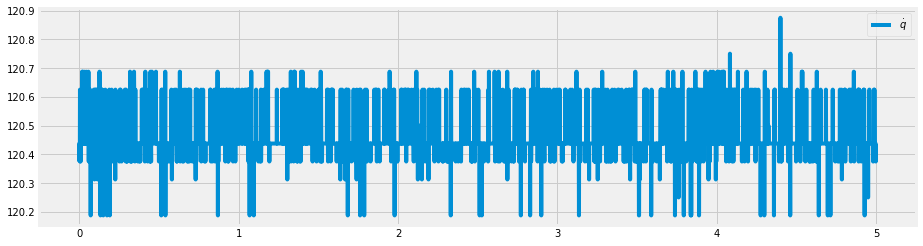

In [5]:
fig = figure(figsize=(14,4))
ax = fig.gca()
p1, = ax.plot(ts, xs);
ax.legend([p1], [r"$\dot{q}$"]);